In [7]:
from pathlib import Path
import itertools

import numpy as np
# https://matplotlib.org/gallery/lines_bars_and_markers/curve_error_band.html#sphx-glr-gallery-lines-bars-and-markers-curve-error-band-py
from scipy.interpolate import splprep, splev


import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.collections as mcollections
import matplotlib.colors as mcolors
import matplotlib.path as mpath
import matplotlib.pyplot as plt


import themepy
spath = Path("../")
theme = themepy.Theme('paper')

%matplotlib inline

In [8]:
#shift emojis left
idx1 = [0,1,2]
idx2= [2,0,1]
idx3 = [1,2, 0]
nu1 = {'confused':'😕', 'woozy':'🥴', 'shruggy':'🙃'}
keys = list(nu1.keys())
nu2 = {keys[i]:nu1[keys[i]] for i in idx2}
nu3 = {keys[i]:nu1[keys[i]] for i in idx3}

c1, c2, c3 = 'C2', 'C5', 'C11'
colork = {'confused':c1, 'woozy':c2, 'shruggy':c3}
colorv = {'😕':c1, '🥴':c2, '🙃':c3}


{'confused': '😕', 'woozy': '🥴', 'shruggy': '🙃'}
{'shruggy': '🙃', 'confused': '😕', 'woozy': '🥴'}
{'woozy': '🥴', 'shruggy': '🙃', 'confused': '😕'}


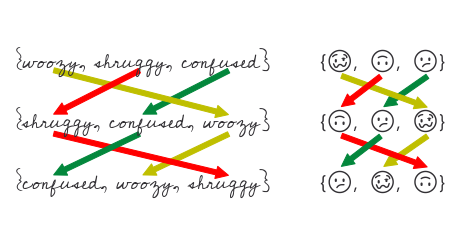

In [63]:
fig, ax = plt.subplots(figsize=(8,4))

for i, nu in enumerate([nu1, nu2, nu3]):
    print(nu)
    ax.text(.2, i/3, f"{{{', '.join(nu.keys())}}}", fontsize=20)
    ax.text(7, i/3, f"{{{',  '.join(nu.values())}}}", fontsize=20, fontfamily='Segoe UI Emoji')

def actions(first, second, third, top, bottom, top2, bottom2):
    e11 =  mpatches.FancyArrowPatch((third, top), (second, bottom), transform=ax.transData,
                                    mutation_scale=ms, color=colork['confused'])
    ax.add_patch(e11) #confused
    e12 = mpatches.FancyArrowPatch((first, top), (third, bottom), transform=ax.transData,
                                   mutation_scale=ms, color=colork['woozy'])
    ax.add_patch(e12) #woozy
    e13 =  mpatches.FancyArrowPatch((second, top), (first, bottom), transform=ax.transData,
                                    mutation_scale=ms, color=colork['shruggy'])
    ax.add_patch(e13)

    e11 =  mpatches.FancyArrowPatch((third, top2), (second, bottom2), transform=ax.transData,
                                    mutation_scale=ms, color=colork['woozy'])
    ax.add_patch(e11) #confused
    e12 = mpatches.FancyArrowPatch((first, top2), (third, bottom2),transform=ax.transData,
                                   mutation_scale=ms, color=colork['shruggy'])
    ax.add_patch(e12) #woozy
    e13 =  mpatches.FancyArrowPatch((second, top2), (first, bottom2), transform=ax.transData,
                                    mutation_scale=ms, color=colork['confused'])
    ax.add_patch(e13)
#emoji shuffle
first, second, third = 7.45, 8.4, 9.45
top, bottom = .62, .44, 
top2, bottom2 = .29, .11
actions(first, second, third, top, bottom, top2, bottom2)

first, second, third = 1, 3, 5
top, bottom = .65, .4, 
top2, bottom2 = .3, .065
actions(first, second, third, top, bottom, top2, bottom2)


ax.set(xlim=(0,10), ylim=(-0.2,1))
ax.axis('off')
#ax.grid()
fig.savefig(spath/"equivariance_nu.png", bbox_inches='tight', facecolor='white' )

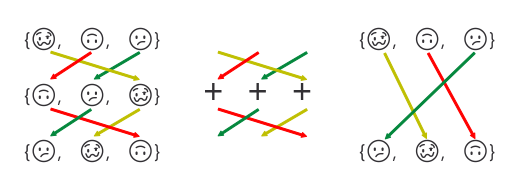

In [10]:
fig, axd = plt.subplot_mosaic([['shift', 'add', 'compose']], 
                                figsize=(9,4.5), 
                                gridspec_kw={'wspace':0, 'hspace':0})
ms = 10

ex = .1
def efmt(nu):
    return f"{{{',   '.join(nu.values())}}}"

text_kw = {'fontsize':20, 'fontfamily':'Segoe UI Emoji'}
for name in ['shift', 'add', 'compose']:
    axd[name].set(xlim=(0,1), ylim=(0,1), aspect='equal')

# two permutations
for i, nu in enumerate([nu1, nu2, nu3]):
    axd['shift'].text(ex, (1/3*i)+.1 ,efmt(nu), 
                      transform = axd['shift'].transData,**text_kw)

first, second, third = 0.25, 0.51, 0.8
def double_arrow(ax):
    top, bottom = .73, .56, 
    e11 =  mpatches.FancyArrowPatch((third, top), (second, bottom), transform=ax.transData,
                                    mutation_scale=ms, color=colork['confused'])
    ax.add_patch(e11) #confused
    e12 = mpatches.FancyArrowPatch((first, top), (third, bottom), transform=ax.transData,
                                   mutation_scale=ms, color=colork['woozy'])
    ax.add_patch(e12) #woozy
    e13 =  mpatches.FancyArrowPatch((second, top), (first, bottom), transform=ax.transData,
                                    mutation_scale=ms, color=colork['shruggy'])
    ax.add_patch(e13)

    top, bottom = .39, .22
    e11 =  mpatches.FancyArrowPatch((third, top), (second, bottom), transform=ax.transData,
                                    mutation_scale=ms, color=colork['woozy'])
    ax.add_patch(e11) #confused
    e12 = mpatches.FancyArrowPatch((first, top), (third, bottom),transform=ax.transData,
                                   mutation_scale=ms, color=colork['shruggy'])
    ax.add_patch(e12) #woozy
    e13 =  mpatches.FancyArrowPatch((second, top), (first, bottom), transform=ax.transData,
                                    mutation_scale=ms, color=colork['confused'])
    ax.add_patch(e13)

double_arrow(axd['shift'])
# composite permutation
middle = ['+', '+', '+']
for i, nu in enumerate([nu1, middle, nu3]):
    text = " +  +  +  " if i == 1 else ""
    text_kw['fontsize'] = 36 if i == 1 else 20
    axd['add'].text(ex, (1/3*i)+.1 ,text , **text_kw)
double_arrow(axd['add'])

def efmt(nu):
    return f"{{{',   '.join(nu.values())}}}"

for i, nu in enumerate([nu1, nu2, nu3]):
    if i==1: continue
    axd['compose'].text(ex, (1/3*i)+.1 , efmt(nu), transform = axd['compose'].transData,**text_kw)
                    
top, bottom = .73, .2
e11 =  mpatches.FancyArrowPatch((first, top), (second, bottom), transform=axd['compose'].transData,
                                mutation_scale=ms, color=colork['woozy'])
axd['compose'].add_patch(e11) #confused
e12 = mpatches.FancyArrowPatch((second, top), (third, bottom),transform=axd['compose'].transData,
                               mutation_scale=ms, color=colork['shruggy'])
axd['compose'].add_patch(e12) #woozy
e13 =  mpatches.FancyArrowPatch((third, top), (first, bottom), transform=axd['compose'].transData,
                                mutation_scale=ms, color=colork['confused'])
axd['compose'].add_patch(e13)


for name in axd:
    axd[name].axis('off')
fig.savefig(spath/"monoid_emoji.png", bbox_inches='tight', facecolor='white' )

(0.0, 1.5, 0.0, 1.0)

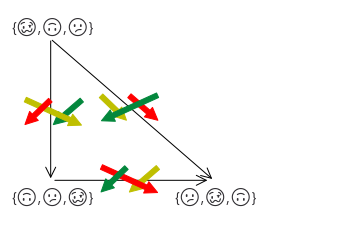

In [11]:
fig, axd = plt.subplot_mosaic([['triangle']])
c1 = .2
c2y = .85
c2x = .95
acolor = 'black'
lw=.5
ms=25
av = mpatches.FancyArrowPatch((c1, c2y), (c1, c1), arrowstyle='->', mutation_scale=ms,color=acolor)
axd['triangle'].add_patch(av)
ah = mpatches.FancyArrowPatch((c1+.01, c1), (c2x-.02, c1),arrowstyle='->', mutation_scale=ms, color=acolor)
axd['triangle'].add_patch(ah)
ad = mpatches.FancyArrowPatch((c1, c2y), (c2x, c1),arrowstyle='->', mutation_scale=ms, color=acolor)
axd['triangle'].add_patch(ad)


yshift = .1
xshift = .18
text_kw['fontsize']=16

def efmt2(nu):
    return f"{{{','.join(nu.values())}}}"

axd['triangle'].text(c1-xshift, c2y+.03 , efmt2(nu3), **text_kw, transform=axd['triangle'].transData) #ul
axd['triangle'].text(c1-xshift, c1-yshift, efmt2(nu2), **text_kw, transform=axd['triangle'].transData) #ll
axd['triangle'].text(c2x-xshift, c1-yshift, efmt2(nu1), **text_kw, transform=axd['triangle'].transData) #lr
axd['triangle'].set(aspect='equal', xlim=(0, 1.5))

ms = 25
originx = np.array([0.25, 0.51, 0.8])*.5
originy = np.array([.75, .5])*.5

# first translation

first, second, third = originx -.05
top, bottom = originy + .2
e11 =  mpatches.FancyArrowPatch((third, top), (second, bottom), transform=axd['triangle'].transData,
                                mutation_scale=ms, color=colork['confused'])
axd['triangle'].add_patch(e11) #confused
e12 = mpatches.FancyArrowPatch((first, top), (third, bottom), transform=axd['triangle'].transData,
                               mutation_scale=ms, color=colork['woozy'])
axd['triangle'].add_patch(e12) #woozy
e13 =  mpatches.FancyArrowPatch((second, top), (first, bottom), transform=axd['triangle'].transData,
                                mutation_scale=ms, color=colork['shruggy'])
axd['triangle'].add_patch(e13)

#second translation
first, second, third = originx +.3
top, bottom = originy - .11
e11 =  mpatches.FancyArrowPatch((third, top), (second, bottom), transform=axd['triangle'].transData,
                                mutation_scale=ms, color=colork['woozy'])
axd['triangle'].add_patch(e11) #confused
e12 = mpatches.FancyArrowPatch((first, top), (third, bottom),transform=axd['triangle'].transData,
                               mutation_scale=ms, color=colork['shruggy'])
axd['triangle'].add_patch(e12) #woozy
e13 =  mpatches.FancyArrowPatch((second, top), (first, bottom), transform=axd['triangle'].transData,
                                mutation_scale=ms, color=colork['confused'])
axd['triangle'].add_patch(e13)
# third translation
first, second, third = originx +.3
top, bottom = originy + .22
e11 =  mpatches.FancyArrowPatch((first, top), (second, bottom), transform=axd['triangle'].transData,
                                mutation_scale=ms, color=colork['woozy'])
axd['triangle'].add_patch(e11) #confused
e12 = mpatches.FancyArrowPatch((second, top), (third, bottom),transform=axd['triangle'].transData,
                               mutation_scale=ms, color=colork['shruggy'])
axd['triangle'].add_patch(e12) #woozy
e13 =  mpatches.FancyArrowPatch((third, top), (first, bottom), transform=axd['triangle'].transData,
                                mutation_scale=ms, color=colork['confused'])
axd['triangle'].add_patch(e13)

axd['triangle'].axis('off')